# Valle del Cauca Exports - EDA

## Dependencies

In [14]:

import os
import sys
import duckdb
import pandas as pd
import numpy as np
import pyarrow as pa
import matplotlib.pyplot as plt

sys.path.append("/workspaces/talento_tech/ingest/")
import config  # type: ignore

## Duckdb Database

In [2]:

db_dir = config.Database.dir
db_filename = config.Database.filename
db_path = os.path.join(db_dir, db_filename)

ddb = duckdb.connect(database=db_path)

In [25]:
df = ddb.sql(
    """SELECT POSAR, FOBPES, COD_PAI4
    FROM valle_exports
    WHERE POSAR IN (
        SELECT POSAR
        FROM top_valle_exports
        LIMIT 10
    );
    """
).df()


In [27]:
df

,POSAR,FOBPES,COD_PAI4
0,39,3.593849e+08,DEU
1,85,4.188726e+08,DEU
2,9,1.796368e+08,DEU
3,85,5.264655e+07,DEU
4,33,2.432270e+08,DEU
...,...,...,...
130252,33,2.972987e+08,MEX
130253,34,2.166904e+08,MEX
130254,39,2.851182e+09,MEX
130255,33,5.122166e+07,MEX


<Axes: xlabel='POSAR', ylabel='FOBPES'>

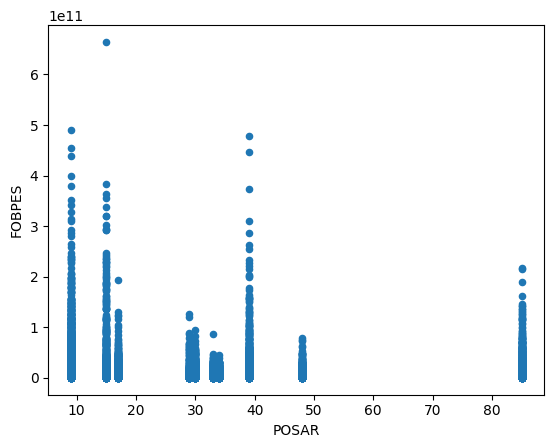

In [28]:
df.plot.scatter(
    x = "POSAR",
    y = "FOBPES"
)

<Axes: ylabel='Frequency'>

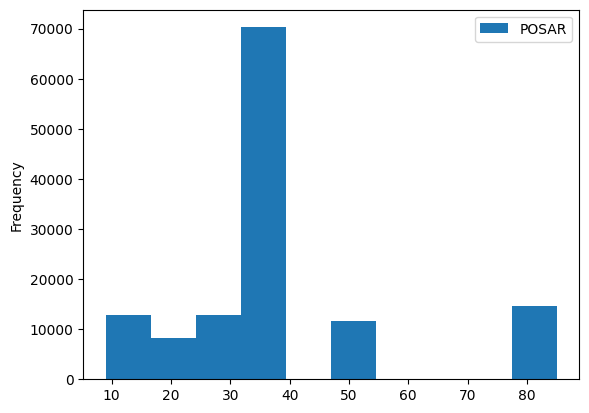

In [21]:
df.plot.hist(column="POSAR")

In [36]:
df["POSAR"] = df["POSAR"].astype(dtype=pd.ArrowDtype(pa.uint8()))